In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
df_1=pd.read_csv('project2/Seoul.csv')

In [3]:
df_2=pd.read_csv('project2/Seoul_Test.csv')

In [4]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [17]:
df_1['년'] = df_1['연월'].apply(lambda x: grap_year(x))
df_1['월'] = df_1['연월'].apply(lambda x: grap_month(x))
df_1 = df_1.drop(['연월'], axis=1)
df_2['년'] = df_2['연월'].apply(lambda x: grap_year(x))
df_2['월'] = df_2['연월'].apply(lambda x: grap_month(x))
df_2 = df_2.drop(['연월'], axis=1)

KeyError: '연월'

In [78]:
df_11=df_1.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()
df_22=df_2.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [79]:
del df_11['매장_시도']
del df_22['매장_시도']

In [80]:
dtypes = df_11.dtypes
encoders = {}
for column in df_11.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_11[column])
        encoders[column] = encoder
        
df_11_num = df_11.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_11_num[column] = encoder.transform(df_11[column])

dtypes = df_22.dtypes
encoders = {}
for column in df_22.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_22[column])
        encoders[column] = encoder
        
df_22_num = df_22.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_22_num[column] = encoder.transform(df_22[column])

In [81]:
y_train=df_11_num.loc[:,'이용금액']
X_train=df_11_num.loc[:,df_11_num.columns !='이용금액']

y_test=df_22_num.loc[:,'이용금액']
X_test=df_22_num.loc[:,df_22_num.columns !='이용금액']

In [82]:
X=pd.concat([X_train,X_test])
y=pd.concat([y_train,y_test])

In [83]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 4.480e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:19:23   Log-Likelihood:            -2.2025e+06
No. Observations:              106865   AIC:                         4.405e+06
Df Residuals:                  106856   BIC:                         4.405e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.851e+09   3.88e+09      2.021      0.043    2.37e+08    1.55e+10
년          -3.875e+06   1.92e+06     -2.014      0.044   -7.65e+06   -1.05e+05
월           5.779e+04   2.12e+05      0.272      0.785   -3.58e+05    4.73e+05
매장_시군구     -1.059e+06   9.09e+04    -11.650      0.000   -1.24e+06   -8.81e+05
업종명         9.371e+05   6.03e+04     15.530      0.000    8.19e+05    1.06e+06
성별         -1.762e+07   1.32e+06    -13.326      0.000   -2.02e+07    -1.5e+07
가구생애주기      1.355e+07   4.72e+05     28.703      0.000    1.26e+07    1.45e+07
이용고객수       1.095e+04    109.084    100.416      0.000    1.07e+04    1.12e+04
이용건수        4737.1654     33.025    143.443      0.000    4672.438    4801.893
==============================================================================
Omnibus:                   153434.975   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84945699.204
Skew:                           8.454   Prob(JB):                         0.00
Kurtosis:                     140.082   Cond. No.                     3.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

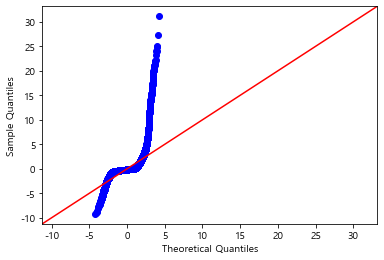

ValueError: shapes (106865,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)

In [86]:


#VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values,i)
                     for i in range(X_train.shape[1])]
vif["features"]=X_train.columns
print(vif)

#학습데이터의 잔차 확인
 
res = model.resid
import matplotlib.pyplot as plt
#Q-Q plot # 정규분포확인
fig = sm.qqplot(res, fit=True, line='45')
plt.show()
# residual pattern 확인
 
predY = model.predict(X_train)
 
fig = plt.scatter(predY,res,s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()
 
#검증 데이터에 대한 예측
 
predY2 = model.predict(X_test)
 
plt.plot(np.array(y_test-predY2),label="predFull")
plt.legend()
plt.show()
 
#MSE 값 구하기
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true=testY,y_pred=predY2)
print(MSE)

In [92]:
X_train.describe().loc["std"]

년             0.396421
월             3.595348
매장_시군구        7.275768
업종명          11.098987
성별            0.499961
가구생애주기        1.403956
이용고객수     15214.333121
이용건수      49943.403046
Name: std, dtype: float64

In [93]:
df=pd.concat([X,y],axis=1)
df

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용건수,이용금액
0,2019,1,0,0,1,1,31,36,1405000
1,2019,1,0,0,1,2,110,121,11861050
2,2019,1,0,0,1,3,86,120,26041090
3,2019,1,0,0,1,4,191,333,79951020
4,2019,1,0,0,1,5,124,192,40362670
...,...,...,...,...,...,...,...,...,...
6739,2020,4,24,38,2,1,562,655,11699785
6740,2020,4,24,38,2,2,512,592,15386030
6741,2020,4,24,38,2,3,327,399,11730268
6742,2020,4,24,38,2,4,1143,1333,46223490


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler()

In [95]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [96]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 4.480e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:22:21   Log-Likelihood:            -2.2025e+06
No. Observations:              106865   AIC:                         4.405e+06
Df Residuals:                  106856   BIC:                         4.405e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.365e+08   6.66e+05    204.956      0.000    1.35e+08    1.38e+08
년          -1.662e+06   8.25e+05     -2.014      0.044   -3.28e+06   -4.48e+04
월           2.027e+05   7.44e+05      0.272      0.785   -1.26e+06    1.66e+06
매장_시군구     -7.705e+06   6.61e+05    -11.650      0.000      -9e+06   -6.41e+06
업종명          1.04e+07    6.7e+05     15.530      0.000    9.09e+06    1.17e+07
성별         -8.809e+06   6.61e+05    -13.326      0.000   -1.01e+07   -7.51e+06
가구생애주기      1.903e+07   6.63e+05     28.703      0.000    1.77e+07    2.03e+07
이용고객수       1.649e+08   1.64e+06    100.416      0.000    1.62e+08    1.68e+08
이용건수        2.345e+08   1.64e+06    143.443      0.000    2.31e+08    2.38e+08
==============================================================================
Omnibus:                   153434.975   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84945699.204
Skew:                           8.454   Prob(JB):                         0.00
Kurtosis:                     140.082   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
df=pd.concat([X,y],axis=1)
df

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용건수,이용금액
0,2019,1,0,0,1,1,31,36,1405000
1,2019,1,0,0,1,2,110,121,11861050
2,2019,1,0,0,1,3,86,120,26041090
3,2019,1,0,0,1,4,191,333,79951020
4,2019,1,0,0,1,5,124,192,40362670
...,...,...,...,...,...,...,...,...,...
6739,2020,4,24,38,2,1,562,655,11699785
6740,2020,4,24,38,2,2,512,592,15386030
6741,2020,4,24,38,2,3,327,399,11730268
6742,2020,4,24,38,2,4,1143,1333,46223490


   VIF Factor features
0    1.330824        년
1    1.330400        월
2    1.001684   매장_시군구
3    1.027126      업종명
4    1.000678       성별
5    1.006123   가구생애주기
6    6.307796    이용고객수
7    6.229897     이용건수


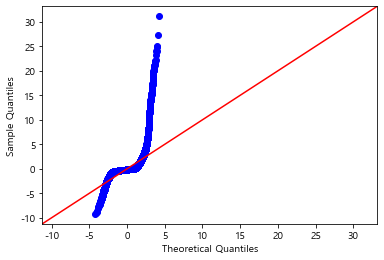

ValueError: shapes (106865,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)

In [98]:

#VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values,i)
                     for i in range(X_train.shape[1])]
vif["features"]=X_train.columns
print(vif)

#학습데이터의 잔차 확인
 
res = model.resid
import matplotlib.pyplot as plt
#Q-Q plot # 정규분포확인
fig = sm.qqplot(res, fit=True, line='45')
plt.show()
# residual pattern 확인
 
predY = model.predict(X_train)
 
fig = plt.scatter(predY,res,s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()
 
#검증 데이터에 대한 예측
 
predY2 = model.predict(X_test)
 
plt.plot(np.array(y_test-predY2),label="predFull")
plt.legend()
plt.show()
 
#MSE 값 구하기
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true=testY,y_pred=predY2)
print(MSE)